# Laboratorium 1

In [3]:
import numpy as np
import sys
import matplotlib.pyplot as plt

In [4]:
eps = sys.float_info.epsilon

In [5]:
def df_numeric(f, x, h):
    return (f(x + h) - f(x)) / h

In [7]:
x = 1

df = 1 + np.tan(x)**2
M = (2 * (1 / np.cos(x))**2) * np.tan(x)

h_values = np.array([10**-k for k in range(17)])
truncation_errors = np.array([(M * h) / 2 for h in h_values])
rounding_errors = np.array([2 * eps / h for h in h_values])
computational_errors = np.array([abs(df_numeric(np.tan, x, h) - df) for h in h_values])

In [8]:
ddf = (2 * (1 / np.cos(x))**2) * np.tan(x)
h_min = 2 * np.sqrt(eps / abs(ddf))
print(h_min)
min_computational_error = min(computational_errors)
print(np.where(computational_errors == min_computational_error)[0][0])

9.123695225180453e-09
8


In [9]:
M = ddf
e_h_min = (M * h_min / 2) + (2 * eps / h_min) 
print(e_h_min)

9.734854110962023e-08


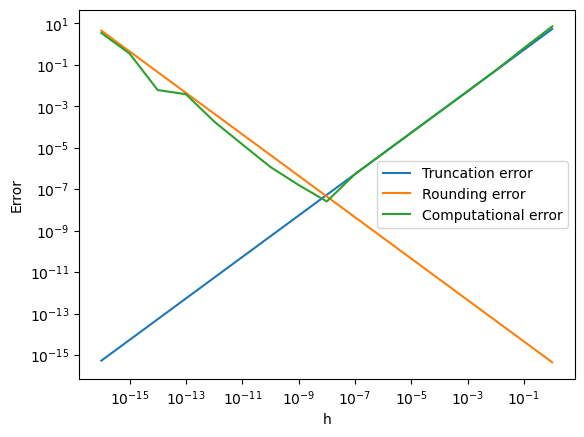

In [10]:
plt.loglog(h_values, truncation_errors, label='Truncation error')
plt.loglog(h_values, rounding_errors, label='Rounding error')
plt.loglog(h_values, computational_errors, label='Computational error')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.show()

In [11]:
def df_central(f, x, h):
    return (f(x + h) - f(x - h)) / (2*h)

In [13]:
x = 1

df = 1 + np.tan(x)**2
M = (2 + 4 * np.sin(x)**2) / np.cos(x)**4

h_values = np.array([10**-k for k in range(17)])
truncation_errors = np.array([(M * h**2) / 6 for h in h_values])
rounding_errors = np.array([eps / h for h in h_values])
computational_errors = np.array([abs(df_central(np.tan, x, h) - df) for h in h_values])

In [14]:
dddf = (2 + 4 * np.sin(x)**2) / np.cos(x)**4

In [16]:
h_min = (3 * eps / abs(dddf))**(1/3)
print(h_min)
min_computational_error = min(computational_errors)
print(np.where(computational_errors == min_computational_error)[0][0])

2.273274156839064e-06
7


In [17]:
M = dddf
e_h_min = (M * h_min**2 / 6) + (eps / h_min) 
print(e_h_min)

1.46514183687668e-10


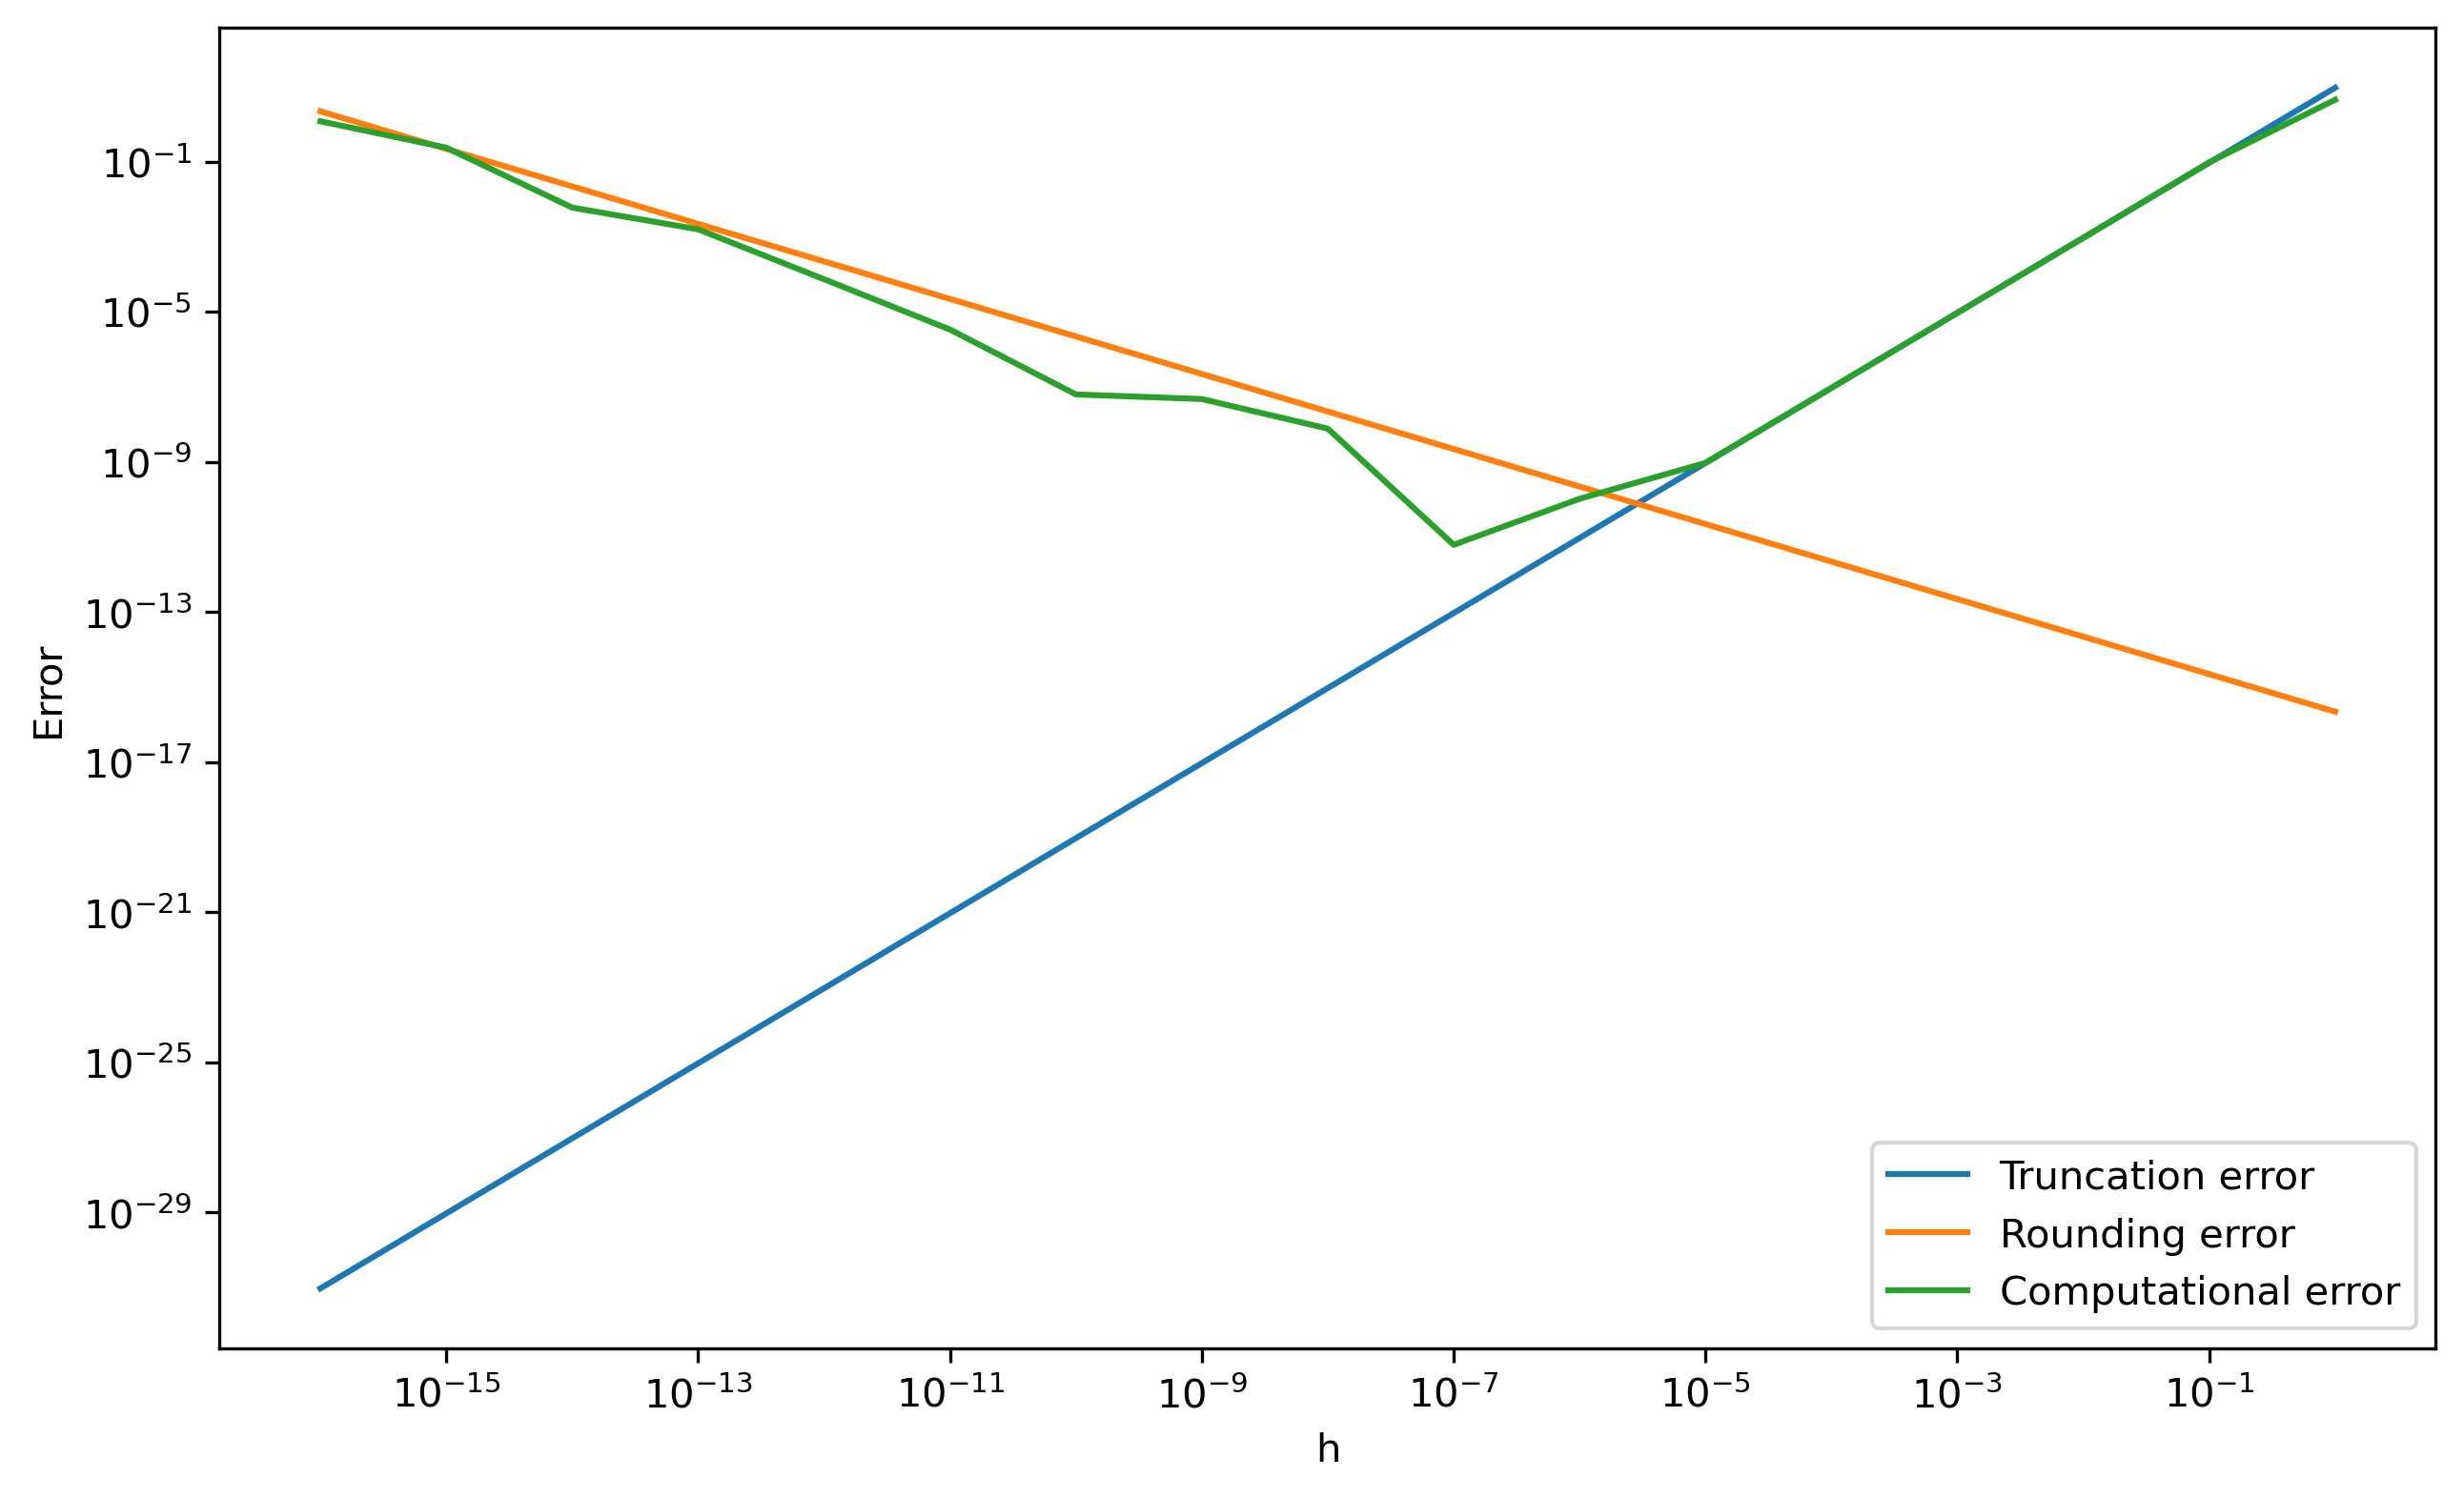

In [18]:
plt.figure(dpi=300, figsize=(10, 6))
plt.loglog(h_values, truncation_errors, label='Truncation error')
plt.loglog(h_values, rounding_errors, label='Rounding error')
plt.loglog(h_values, computational_errors, label='Computational error')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.show()